In [ ]:
!pip install probscale pingouin

     |████████████████████████████████| 434 kB 14.6 MB/s 
     |████████████████████████████████| 182 kB 73.6 MB/s 
     |████████████████████████████████| 28.5 MB 51 kB/s 
     |████████████████████████████████| 9.8 MB 33.0 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.0-py3-none-any.whl size=193661 sha256=cc9f300745ffe76e61409407d610f8db42492721a574838b758c02b6d405a4d7
  Stored in directory: /root/.cache/pip/wheels/14/46/f9/cedd81d68d2515c24bbbd000d5b347e4fe092ccc4b568f7f70
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=652873d6d997e0b2837d652828f4a2f93a946deeddd90cdc6f3d2942ec1fd705
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: statsmodels
    Found existin

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
from scipy.stats import chisquare
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.utils import resample
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import cut_tree
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score
import random
import probscale

import xgboost as xgb
from scipy import stats
from scipy.stats import chisquare
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.utils import resample
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import cut_tree
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, auc, accuracy_score, recall_score, precision_score

from sklearn import model_selection, tree, linear_model, neighbors, naive_bayes, ensemble
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from imblearn.over_sampling import SMOTE

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate


import numpy.random as npr
import scipy.stats as stats

# formulat interface to statsmodels (standard linear models)
import statsmodels.formula.api as smf

from scipy.cluster.vq import vq, kmeans
import matplotlib.patches as mpatches
from collections import defaultdict

from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn import preprocessing  # to normalise existing X


from scipy.stats import ranksums
from scipy import stats
from scipy.cluster.hierarchy import fcluster
from scipy.spatial.distance import pdist

%matplotlib inline 


import warnings
warnings.filterwarnings("ignore")


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# Wstęp 
Dana analiza ma na podstawie dostarczonych danych pomóc odpowiedzieć na pytanie 

"**Czy dany klient może spłacić zaciągniętą pożyczkę**?"

Żeby odpowiedzieć na to pytanie wykonanamy następujące kroki:
- Krótki opis danych wejściowych.
- Transformacja surowych danych(uzupełnianie braków, usunięcie kolumn ze zbyt dużą liczbą braków lub nie wnoszących nic do analizy).
- stworzenie nowych zmiennych na podstawie już "doprowadzonych do ładu", często dopiero nowe zmienne posiadają wartość predykcyjną.
- Wykonanie eksploracji i wizualizacji danych, ten krok pozwoli nam odpowiedzięc na wiele pytań, oraz może pokazać informacje, ktore się widocznie na pierwszy rzut oka.
- Wykonanie podstawowych testów statystycznych, żeby upewnić czy dane wejściowe mają statystyczny wpływ na przewidywaną zmienną(Spłacenie kredytu, badź jego nie spłacenie). Cała analiza będzie się opierać na wskazniku **FICO**.
- Selekcja koleumn w celu ich póżniejszego modelowania.
- Modelowanie za pomocą **klasyfikacji** - używając wyselekcjonowane kolumny, sprawdzamy zdolność klienta do spłaty(0 - nie spłaci, 1 - spłaci).
- Znalezienie najlepszego modelu - czyli o najwyższej metryce AUC(Area Under Curve) - wartość 0 oznacza najgorszy możliwy wynik, 1 - najlepszy.
- Ulepszanie modelu przy pomocy Grid Search - przesukiwanie przestrzeni parametrów w ten sposób, aby używać ich optymalny zestaw. Tym spoboem dostajemy najlepszy możliwy model i wynik **AUC**.
- Próba sprawdzenia czy istnieją *segmenty* klientów - wskażnik **FICO** sugeruje 5 segmentów - spawdzimy za pomocą kilku algorytnów klasteryzacji czy faktycznie liczba segmentów się zgadza.

Każdy z wyżej wymienionych punktów zostanie rozwinięty i okraszony komentarzem.
Odnośnie **FICO** można więcej poczytać w załączniku dodanych do analizy, na ten moment wystarczy informacja że im bliżej wartości 1000, tym bardziej klient jest "bezpieczny dla pożyczkodawcy",


# Używane funkcje
W tej sekcji znajdują się wszystkie funkcje, które zostaną użyte w dalszej części analizy.

In [ ]:

def na_handling(df, name_of_strategy,specific_value="0"):
  """
  Uzupełnianie braków w kolumnach wg określonej strategii:
  - mean - uzupełnianie braków za pomocą średniej, stosuje się tylko dla danych ilościowych
  - mode - uzupełnianie braków za pomocą mody, raczej dla wartości dyskretnych, można stosować dla danych kategorycznych
  - 0 - uzupełnianie braków za pomocą 0, stosuje się w przypadku, gdzie wartość 0 ma jasną interpretację.
  - specific value - uzywamy w przypadku gdy chcemy użyć jakieś customowej wartości, np 33 lub dwa, ważne żeby wartość była tego samego typu co uzupełniania kolumna.
  - next_row, previous_row
  
  """

  if name_of_strategy=="previous_row":
    df.fillna(method="backfill", inplace=True)
    return df
  elif name_of_strategy=="next_row":
    df.fillna(method="ffill", inplace=True)
    return df
  elif name_of_strategy=="0":
    df.fillna(0, inplace=True)
    return df
  elif name_of_strategy=="specific_value":
    df.fillna(spefic_value, inplace=True)
    return df
  

  elif name_of_strategy=="mean":
    df.fillna(df.mean(), inplace=True)
    return df
  elif name_of_strategy=="mode":
    df.fillna(df.mode(dropna=True), inplace=True)
    return df
  else:
    print("Wrong specified strategy")

def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 




def is_missing(df):
	    "Determine if ANY Value in a Series is Missing"
	    x = df.isnull().values.any()
	    print(x)

def get_numerical_columns(df):
		numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
		numerical_columns = df.select_dtypes(include=numerics).columns
		return df[numerical_columns]

def normalization(df):
	    normalized = df.apply(lambda x: x/max(x))
	    return normalized
	

def standarization(df):
    standarized = df.apply(lambda x: (x - x.mean()) /max(x))
    return standarized

def show_heatmap(df):
  plt.figure(figsize=(12,10))
  cor = df.corr()
  sns.heatmap(cor, annot=True)
  return cor
  plt.show()
  
def smote(X,y):
  smote = SMOTE(ratio='minority')
  X_sm, y_sm = smote.fit_sample(X, y)
  return X_sm, y_sm





In [ ]:
!wget -O Loan_data.csv https://www.dropbox.com/s/00k3tjvf8p1mnp2/Loan_data%20%281%29.csv?dl=0
!wget -O LCDataDictionary.csv https://www.dropbox.com/s/jsjnz6k94dbj5f6/LCDataDictionary%20%281%29.csv?dl=0

--2021-11-02 20:46:39--  https://www.dropbox.com/s/00k3tjvf8p1mnp2/Loan_data%20%281%29.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.71.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.71.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/00k3tjvf8p1mnp2/Loan_data%20%281%29.csv [following]
--2021-11-02 20:46:40--  https://www.dropbox.com/s/raw/00k3tjvf8p1mnp2/Loan_data%20%281%29.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc787af18bae475417e12a8bbb94.dl.dropboxusercontent.com/cd/0/inline/BZMwTajQ0cWAFJVETavzyqvb9pmgmlHF43kSW9W9av9VdqAfH9ShRvfahypiXIOPsr2DZZygrdEad6uezOJld9M0SliyTMbh6O1-ufCnyA62w63JozAlFPXEzqLLQRZ2-6-kBVUUHwp9Obf2Cy0uqp3a/file# [following]
--2021-11-02 20:46:40--  https://uc787af18bae475417e12a8bbb94.dl.dropboxusercontent.com/cd/0/inline/BZMwTajQ0cWAFJVETavzyqvb9pmgmlHF43kSW9W9av9VdqAfH

In [ ]:
file_path = "/content/Loan_data.csv"

In [ ]:
# Wczytanie danych
df = pd.read_csv(file_path)


In [ ]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [ ]:
df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,1077501,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,NaN,NaN,2.0,0.0,2956.0,98.5%,10.0,f,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,690.0,694.0,1.0,35.0,NaN,10.0,0.0,5598.0,21%,37.0,f,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,695.0,699.0,0.0,38.0,NaN,15.0,0.0,27783.0,53.9%,38.0,f,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
5,1075269,NaN,5000.0,5000.0,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,wedding,My wedding loan I promise to pay b

In [ ]:
#liczba kolumn
len(df.columns)

151

In [ ]:
# Krótki opis kolumn.

In [ ]:
file_path = "/content/LCDataDictionary.csv"

In [ ]:
description_columns_df = pd.read_csv(file_path)
description = description_columns_df.dropna(axis=1, how='all').style.set_properties(subset=['Description'], **{'width': '1000px'})


In [ ]:
description

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


In [ ]:
# sprawdzamy metadane o datasecie

In [ ]:
def dataframe_metainformation(df):
  meta = dict()
  descr = pd.DataFrame({'dtype': df.dtypes, 'NAs': df.isna().sum()})
  categorical_features = descr.loc[descr['dtype'] == 'object'].index.values.tolist()
  numerical_features = descr.loc[descr['dtype'] != 'object'].index.values.tolist()
  numerical_features_na = descr.loc[(descr['dtype'] != 'object') & (descr['NAs'] > 0)].index.values.tolist()
  categorical_features_na = descr.loc[(descr['dtype'] == 'object') & (descr['NAs'] > 0)].index.values.tolist()
  complete_features = descr.loc[descr['NAs'] == 0].index.values.tolist()
  meta['description'] = descr
  meta['categorical_features'] = categorical_features
  meta['categorical_features'] = categorical_features
  meta['categorical_features_na'] = categorical_features_na
  meta['numerical_features'] = numerical_features
  meta['numerical_features_na'] = numerical_features_na
  meta['complete_features'] = complete_features
  return meta

def print_metainformation(meta):
  print('Available types:', meta['description']['dtype'].unique())
  print('{} Features'.format(meta['description'].shape[0]))
  print('{} categorical features'.format(len(meta['categorical_features'])))
  print('{} numerical features'.format(len(meta['numerical_features'])))
  print('{} categorical features with NAs'.format(len(meta['categorical_features_na'])))
  print('{} numerical features with NAs'.format(len(meta['numerical_features_na'])))
  print('{} Complete features'.format(len(meta['complete_features'])))

In [ ]:
meta = dataframe_metainformation(df)
print_metainformation(meta)


Available types: [dtype('O') dtype('float64')]
151 Features
31 categorical features
120 numerical features
30 categorical features with NAs
120 numerical features with NAs
1 Complete features


In [ ]:
#liczba brakow w columns
temp=df.isnull().sum()
temp = pd.DataFrame(temp)
mapping = {temp.columns[0]:'Count'}
temp = temp.rename(columns=mapping)
temp.style.set_properties(subset=['Count'], **{'width': '1000px'})

,Count
id,0
member_id,42536
loan_amnt,1
funded_amnt,1
funded_amnt_inv,1
term,1
int_rate,1
installment,1
grade,1
sub_grade,1


In [ ]:
temp["procent_brakow"]=(temp["Count"]/len(df))*100

In [ ]:
temp['procent_brakow'].to_frame().style.set_properties(subset=['procent_brakow'], **{'width': '1000px'})

,procent_brakow
id,0.000000
member_id,100.000000
loan_amnt,0.002351
funded_amnt,0.002351
funded_amnt_inv,0.002351
term,0.002351
int_rate,0.002351
installment,0.002351
grade,0.002351
sub_grade,0.002351


# Obróbka danych (Data Processing) 

# Selekcja kolumnn kryteriów takich jak:
- Wszystkie wszystkie wiersze są puste. 
- Brakuje ponad 50% informacji.
- Posiadanie tylko jednej wartości - takie dane nie wnoszą nic do analizy.



In [ ]:
df = df.drop(['recoveries', 'url','desc','zip_code', 'id', 'sub_grade', 'out_prncp', 'out_prncp_inv', 'emp_title', 'title', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d'], axis=1)
df = df.dropna(axis=1, how='all')
df = df.dropna(axis=1, thresh=0.5*len(df))
df = df.loc[:, df.apply(pd.Series.nunique) != 1]

Sprawdzamy ile po tych filtrowaniu zostało nam zmiennych 

In [ ]:
len(df.columns)

39

In [ ]:
for col in df.select_dtypes(include='object').columns[2:]:
  # print(col, df[col].unique())
  print(col)

grade
emp_length
home_ownership
verification_status
issue_d
loan_status
purpose
addr_state
earliest_cr_line
revol_util
debt_settlement_flag


Z początkowych 151, po wstępnej filtrachi zostało nam 40 kolumn. Przyjrzyjmy się bliżej tej **nikczemnej** 40.

Przede wszystkim trzeba się zająć zmienną **loan_status** oraz kolumnami opisujący **FICO**, gdyż one są kluczowe w naszej analizie. Pierwsze co z nimi, zróbmy z nimi porządek i zakodujmy w odpowiedni sposób.

In [ ]:
# Kodowanie zmiennej loan_status ---> 0: niespłacona, 1: spłacona

replace_values = {'Fully Paid' : 1, 'Charged Off' : 0, 'Does not meet the credit policy. Status:Charged Off' : 0, 'Does not meet the credit policy. Status:Fully Paid' : 1} 
df['loan_status'] = df['loan_status'].map(replace_values)


In [ ]:
dict_ = {'B':5, 'C':4, 'A':6, 'E':2, 'F':1, 'D':3, 'G':0}
df['grade'] = df['grade'].map(dict_)

df['term'] = df['term'].map({' 36 months': 36, ' 60 months': 60})
df['int_rate'] = df['int_rate'].str.rstrip('%').astype('float')
df['emp_length'] = df['emp_length'].map({'10+ years':10, '< 1 year':0, '1 year':1, '3 years':3, '8 years':8, '9 years':9,
       '4 years':4, '5 years':5, '6 years':6, '2 years':2, '7 years':7})
df['revol_util'] = df['revol_util'].str.rstrip('%').astype('float')

In [ ]:
# df= encode_and_bind(df,'purpose')
df = encode_and_bind(df, 'debt_settlement_flag')

In [ ]:
# kodowanie FICO

In [ ]:
#Przygotowanie danych

df.dropna(subset= ['fico_range_high', 'fico_range_low'], inplace=True)

df['fico_average'] = (df['fico_range_high'] + df['fico_range_low']) / 2  


Przyjrzyjmy się rozkładowi danych zmiennych **loan_status** i **FICO**.

[]

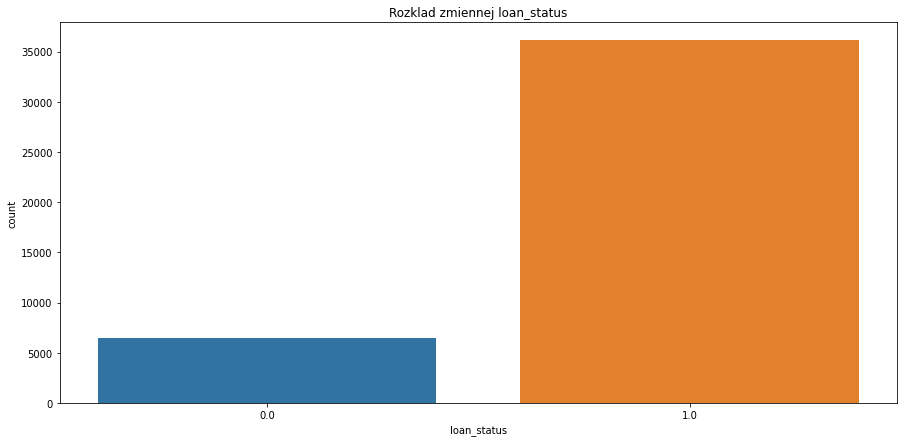

In [ ]:
col = 'loan_status'

plt.figure(figsize=[15,7])
plt.xlabel("0 - nie spłaci, 1 - spłaci")
plt.ylabel("liczba wystąpień danej klasy")
plt.title("Rozklad zmiennej loan_status")
sns.countplot(x=col, data=df)
plt.plot()

**Dobrych** pożyczek jest blisko 7 razy wiecej niż **złych**, jest to dość naturalne, gdyż każda instytucja stara się nie udzielać ich osobom, nie bedą wstanie ich spłacić. Więc problem nie zbalansowania danych właściwie tu nie jest ważny, gdyż dla nas najważniejsze jak najwcześniejsze wyłapywanie klientów typu **0**. Bliżej zostanie to omówione przy klasyfikacji w kontekscie metryki **ROC**.

In [ ]:
#Zmienna FICO

In [ ]:
#Zbadajmy zmienna FICO w dwóch podejściach - najpierw jako zmienna ciągła, następnie jako dyskretna(w tym celu wykonamy odpowiednie kodowanie)

In [ ]:
#wersja ciągła

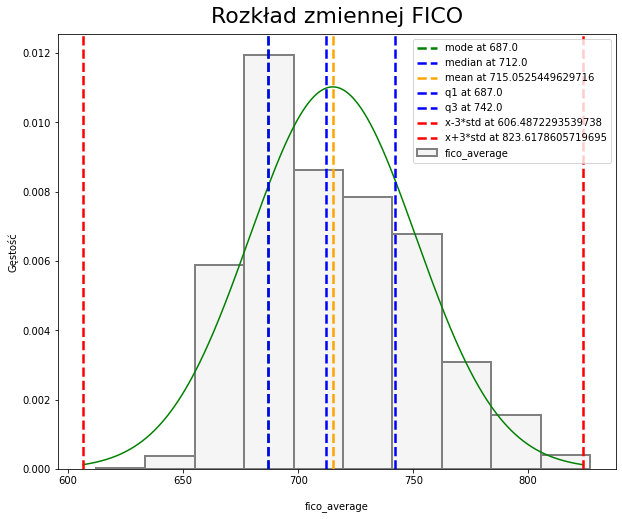

statistics mean=715.053, q1=687.0, q3=742.0, var=1309.603, std=36.188, skew=0.465, kurtosis=-0.496, IRQ=55.0


In [ ]:
col = 'fico_average'


mode, median, mean = df[col].mode()[0], df[col].median(), df[col].mean()
q1, q3, var, std, skew, kur = df[col].quantile(0.25), df[col].quantile(0.75), df[col].var(), df[col].std(), df[col].skew(), df[col].kurtosis()
irq = q3-q1

statistics = [mean,  q1, q3, var, std, skew, kur, irq]
statistics = [round(x,3) for x in statistics]

param = stats.norm.fit(df[col])   # Dopasowanie rozkladu normalnego do danych 
x1, x2 =  mean-3*std, mean+3*std
N = len(df[col])
x = np.linspace(x1,x2, N)
pdf_fitted = stats.norm.pdf(x, *param)

    
plt.plot(x, pdf_fitted, color='green')
df[col].plot(kind='hist', figsize=(10, 8), linewidth=2 , color='whitesmoke', edgecolor='gray', density=True)
plt.xlabel(str(col), labelpad=15)
plt.ylabel("Gęstość")
plt.title("Rozkład zmiennej FICO", y=1.012, fontsize=22)
measurements = [mode, median, mean, q1, q3, mean-3*std, mean+3*std]
# measurement = [round(x, 3) for x in measurement]




names = ["mode", "median", "mean", "q1", "q3", "x-3*std", "x+3*std"]
colors = ['green', 'blue', 'orange', 'blue', 'blue', 'red', 'red']

for measurement, name, color in zip(measurements, names, colors):
  plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=color)
  plt.legend();
plt.show()
print("statistics mean={}, q1={}, q3={}, var={}, std={}, skew={}, kurtosis={}, IRQ={}".format(*statistics))





Rozkład zmiennej **FICO** przypomina rozkład normalny aczkolwiek ma medianę na lewo od wartości średniej, co sugeruje rozkład prawoskośny. Sprawdźmy testem **Shapiro-Wilka**, czy zmienną **FICO** możemy traktować, jako modelowaną rozkładem normalnym.


In [ ]:
stat, p  = stats.shapiro(df['fico_average'])
alpha = 0.05
if p > alpha:
	print('Dane mają rozkład normalny (nie odrzucamy H0)')
else:
	print('Dane nie mają rozkładu normalnego')

Dane nie mają rozkładu normalnego


In [ ]:
#Zmienna FICO nie ma rozkładu normalnego, co może skutkować tym, że nie będziemy uprawnieni używać do tych testów, ktore zakładają rozkład normalny.

Podejście dyskretne do zmiennej **FICO**

In [ ]:
# Robocza hipoteza, im wyzsze FICO, tym wieksze prawdopodobienstwo splacenia pozyczki
# przekodujmy zmienna fico_average wg klucza
# 580 as very poor, 580–669 as fair, 670–739 as good, 740–799 as very good, and 800–850 as exceptional.


def encode_fico(x):
  if x<=580:
    return 'Poor'
  elif x >580  and x<= 669:
    return "Fair"
  elif x >669 and x<= 739:
    return "Good"
  elif x >739 and x <= 799:
    return 'Very Good'
  else:
    return 'Exceptional'

df["FICO_name"] = df['fico_average'].apply(lambda x: encode_fico(x))

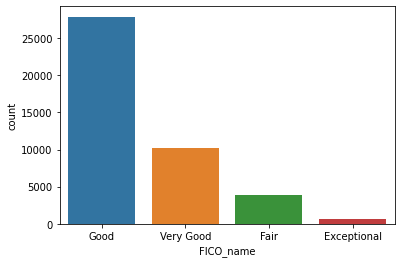

In [ ]:
sns.countplot(x = "FICO_name", data=df)

In [ ]:
#spawdzmy ile dokładnie każda klasa w FICO_name ma elementów

df["FICO_name"].value_counts()

Good           27846
Very Good      10171
Fair            3894
Exceptional      624
Name: FICO_name, dtype: int64

In [ ]:
#Zgodnie z intuicja, nie ma pożyczek dla ludzi z klasy "Poor", gdyż pożyczanie im pieniędzy wiąże się z dużym ryzykiem

In [ ]:
# W jaki sposób wynik FICO wiąże się z prawdopodobieństwem spłacenia pożyczki przez pożyczkobiorcę?

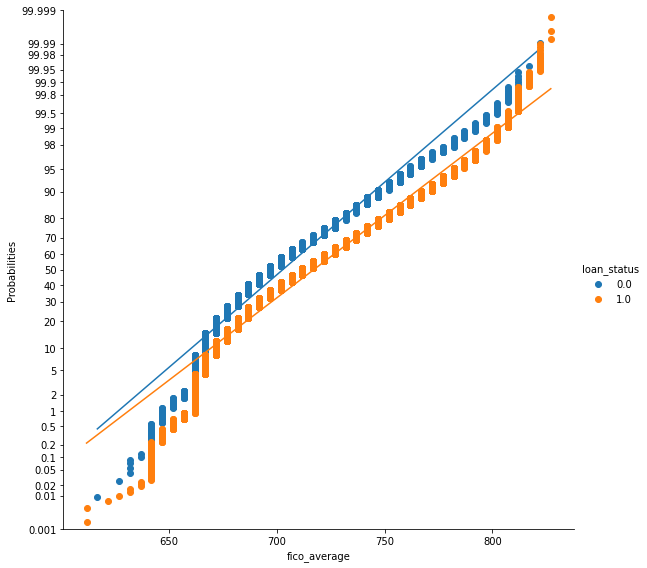

In [ ]:
g = sns.FacetGrid(df, hue='loan_status', height=8)
g.map(probscale.probplot, 'fico_average', probax='y', bestfit=True)
g.set_ylabels('Probabilities')
g.add_legend()

In [ ]:
#Linie ciagle wyznaczjaa rozklad normalny, kazde odchylenie od od tej linii sugeruje odstepstwo od niego
# Duze odstepy widac do wartosci okolo 670, co odpowiadaja wartosci dystrubuanty okolo 10%
# Tu sugeruje ze dwie grupy posiadaja rozkład lewoskosny, co wydaje sie intuicyjne, mało osób spłaca szybko swoje kredyty

# Na postawie powyższego wykresu, potwiedrdza się hipoteza, że im wyższa wartość FICO, tym większe prawdopobieństwo spłaty pożyczki.
# Widac to od wartosci FICO zaczynajac od okolo 820.

In [ ]:
#Uzupelnienie brakow
df = na_handling(df, "previous_row")
df = na_handling(df, "next_row")

In [ ]:
# W jaki sposób wiek kredytowy wiąże się z prawdopodobieństwem niewykonania zobowiązania i czy ryzyko to jest niezależne lub związane z wynikiem FICO



In [ ]:
df['data_pozyczki'] = pd.to_datetime(df['earliest_cr_line'])
df['rok_pozyczki']=df['data_pozyczki'].apply(lambda x: x.year) #1
ostatni_rok = max(df['rok_pozyczki'])
df['czas_trwania_pozyczki'] = df['rok_pozyczki'].apply(lambda x: ostatni_rok-x) #2

Text(0, 0.5, 'Czestosc')

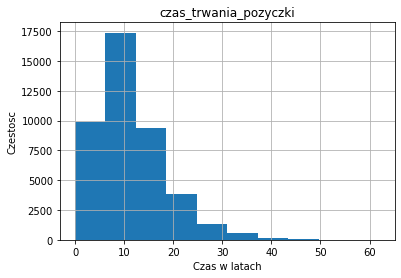

In [ ]:
df['czas_trwania_pozyczki'].hist()
plt.title('czas_trwania_pozyczki')
plt.xlabel("Czas w latach")
plt.ylabel("Czestosc")

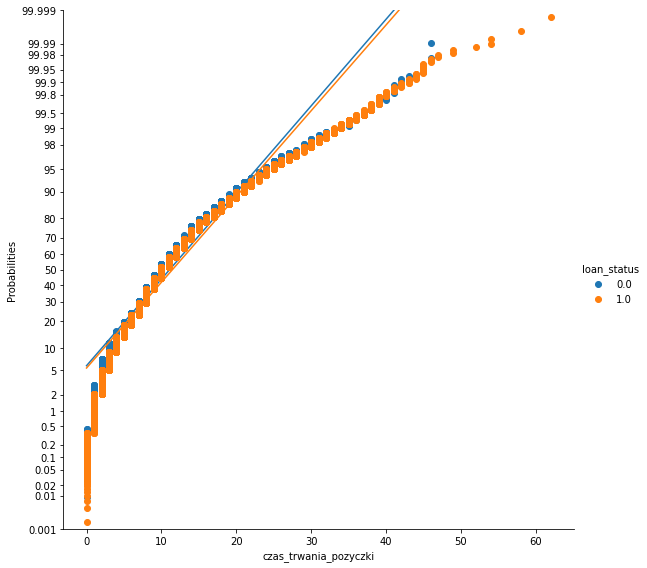

In [ ]:
g = sns.FacetGrid(df, hue='loan_status', height=8)
g.map(probscale.probplot, 'czas_trwania_pozyczki', probax='y', bestfit=True)
g.set_ylabels('Probabilities')
g.add_legend()

In [ ]:
# Nie widać zasadniczych różnic w prawdopodienstwie spłaty miedzy grupami, po okolo 25 roku pożyczki spada nieco dynamika prawdopodoietswa spłaty

In [ ]:
# 	•	W jaki sposób status kredytu hipotecznego na dom wiąże się z prawdopodobieństwem niewypłacalności?
df['home_ownership'] = df['home_ownership'].map({'RENT':1,  'OWN':2, 'MORTGAGE':3, 'OTHER':4, 'NONE':5})

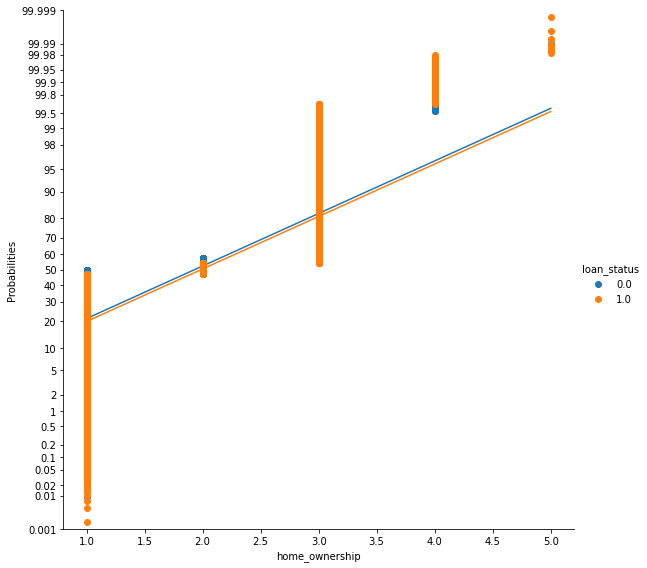

In [ ]:
g = sns.FacetGrid(df, hue='loan_status', height=8)
g.map(probscale.probplot, 'home_ownership', probax='y', bestfit=True)
g.set_ylabels('Probabilities')
g.add_legend()

In [ ]:
# osoby ktore wynajmuja(RENT wedlug danych, maja najmniejsze prawdopobienstwo splacenia pozyczki
# osoby ktore maja kredyt hipoteczny(MORTGAGE), z wiekszym prawdopodobienstwem splaca kredyt - te osoby przeszly wstepna weryfikacje,
# zatem dosc naturalne jest to, ze sa w lepszej sutyacji niz RENT
# OTHER i NONE - prawdopodobnie to sa grupy, ktore tycza inwestorow lub alternatywnych sposobow posiadania type leasehold(dzierzawa)
# w przypadku leaahold kwoty sa nizsze od typowej wlasnosci, wiec i prawodpodobienstwo spłaty sie zwieksza 

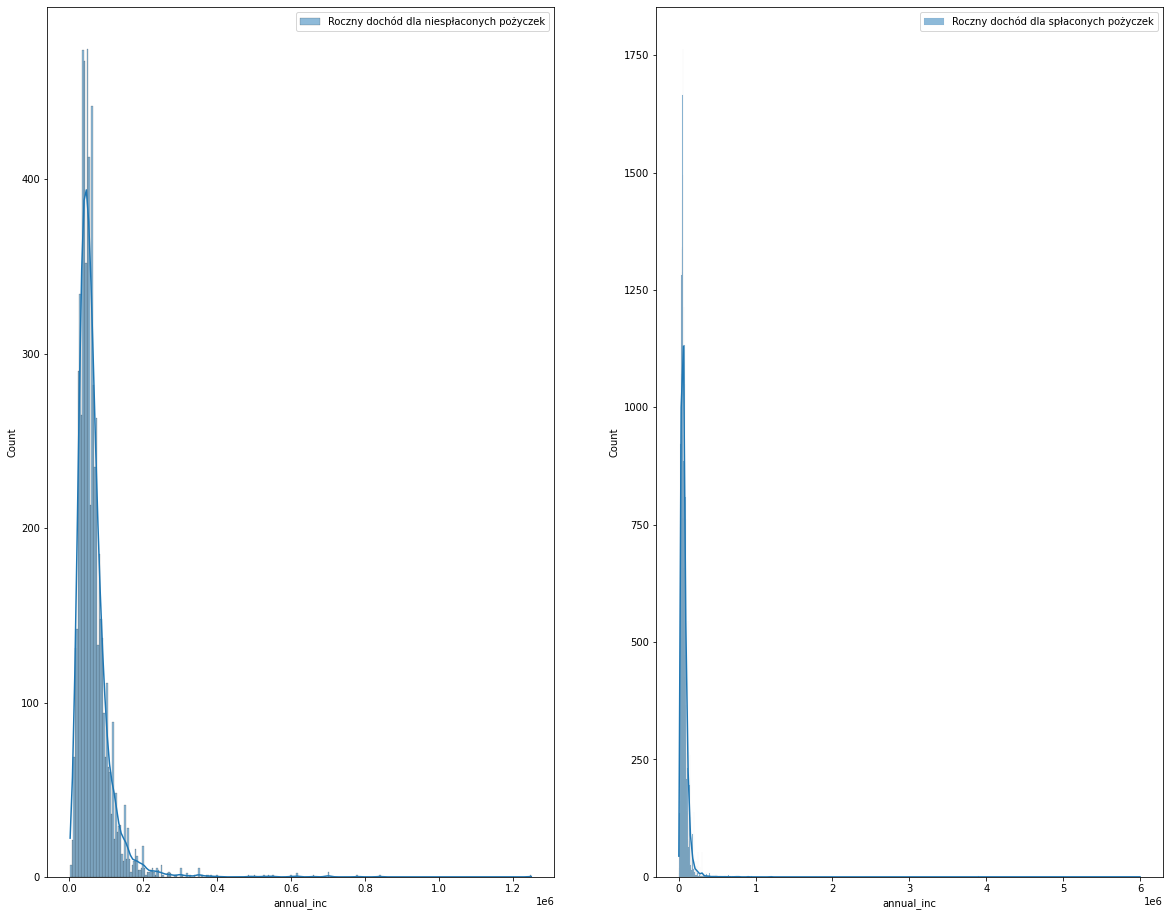

In [ ]:
# 	•	W jaki sposób roczny dochód wiąże się z prawdopodobieństwem niewykonania zobowiązania?
df_niesplacone = df[df['loan_status']==0]
df_splacone = df[df['loan_status']==1]



plt.figure(figsize=(20,16))
plt.subplot(1,2,1)
sns.histplot(df_niesplacone['annual_inc'],label='Roczny dochód dla niespłaconych pożyczek', kde=True)
plt.legend()
plt.subplot(1,2,2)
sns.histplot(df_splacone['annual_inc'],label='Roczny dochód dla spłaconych pożyczek', kde=True)
plt.legend()

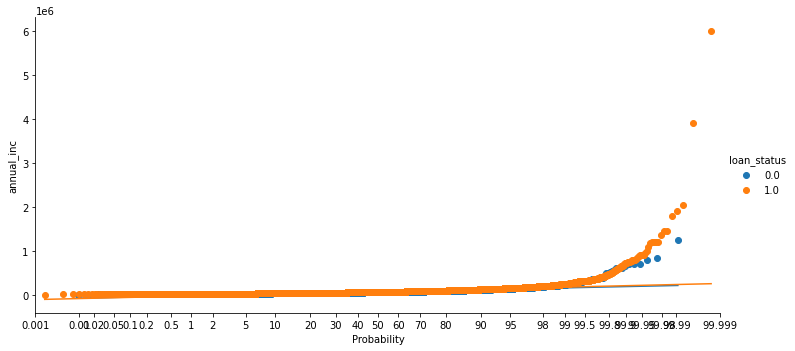

In [ ]:
g = sns.FacetGrid(df, hue='loan_status', height=5, aspect=2)
g.map(probscale.probplot, 'annual_inc', bestfit=True)
g.set_axis_labels(x_var='Probability', y_var='annual_inc')
g.add_legend()

In [ ]:
# rozklad prawdopobienstwa splaty kredytu oraz przychodow jesli scisle powiazany(pokrywaja sie sie linia prosta)
# odstepstwa zaczynaja się od 99.5%, najbogatsi moga sobie pozwolic na szybsza splate 

In [ ]:
# 	•	W jaki sposób historia zatrudnienia wiąże się z prawdopodobieństwem niewykonania zobowiązania?


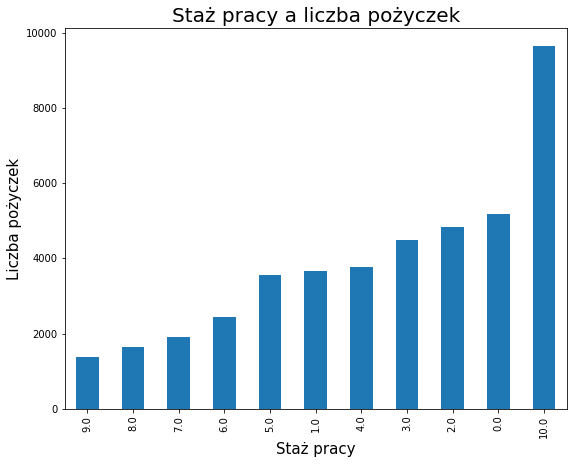

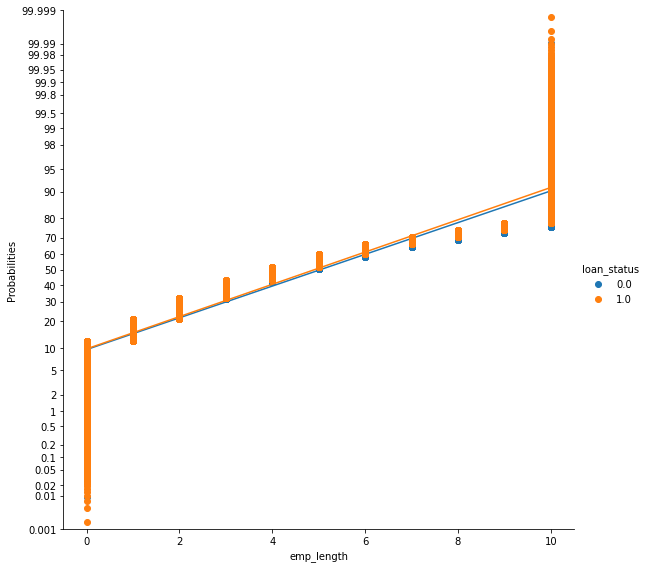

In [ ]:
df['emp_length'].value_counts().sort_values().plot(kind='bar',figsize=(9,7))
plt.title('Staż pracy a liczba pożyczek',fontsize=20)
plt.ylabel('Liczba pożyczek',fontsize=15)
plt.xlabel('Staż pracy',fontsize=15);

g = sns.FacetGrid(df, hue='loan_status', height=8)
g.map(probscale.probplot, 'emp_length', probax='y', bestfit=True)
g.set_ylabels('Probabilities')
g.add_legend()

In [ ]:
# najwiecej pozyczek obie grupy dostaja w okolo 10 roku stazu pracy, co jest naturalne, gdyz od okolo tego okresu stablizuje sie sytuacja materialna

In [ ]:
# 	•	Jak wielkość żądanej pożyczki jest powiązana z prawdopodobieństwem niewykonania zobowiązania?

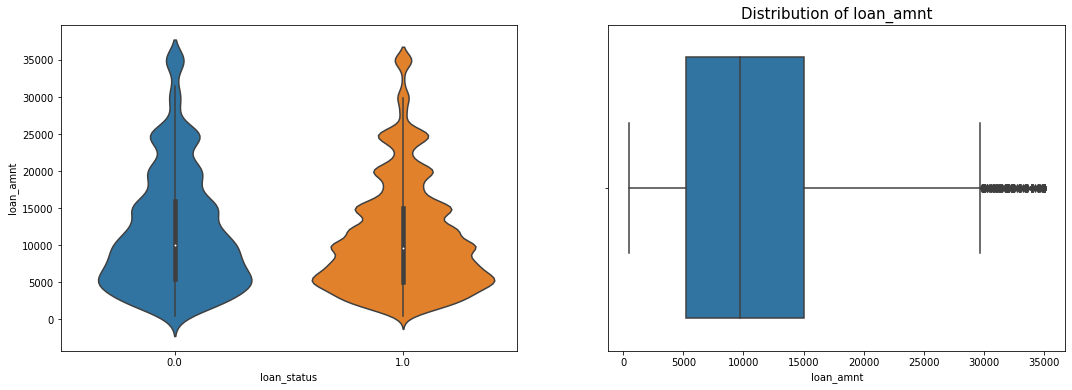

In [ ]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(18,6))
sns.violinplot(x=df['loan_status'], y=df['loan_amnt'], ax=ax1)

sns.boxplot(x='loan_amnt',data=df, ax=ax2)
plt.title('Distribution of loan_amnt', fontsize=15)
plt.tick_params(labelsize=10)

In [ ]:
def encode_loan(x):
  if x<=5000:
    return 'Small'
  elif x >5000  and x<= 10000:
    return 'Middle'
  elif x >10000 and x<= 15000:
    return 'Big'
  else:
    return 'Very Big'

df['loan_group'] = df['loan_amnt'].apply(lambda x: encode_loan(x)) #3







df['loan_group'].value_counts()

Middle      13901
Small       10542
Very Big     9662
Big          8430
Name: loan_group, dtype: int64

In [ ]:
# fig, (ax1, ax2)= plt.subplots(nrows=1, ncols=2, figsize=(20,6))
# sns.boxplot(x='grade', y='loan_amnt', data=df, ax=ax1)
# sns.boxplot(x='fico_group', y='loan_amnt', data=df, ax=ax2, order=['Fair', 'Good', 'Very Good', 'Exceptional'])
# plt.tight_layout()

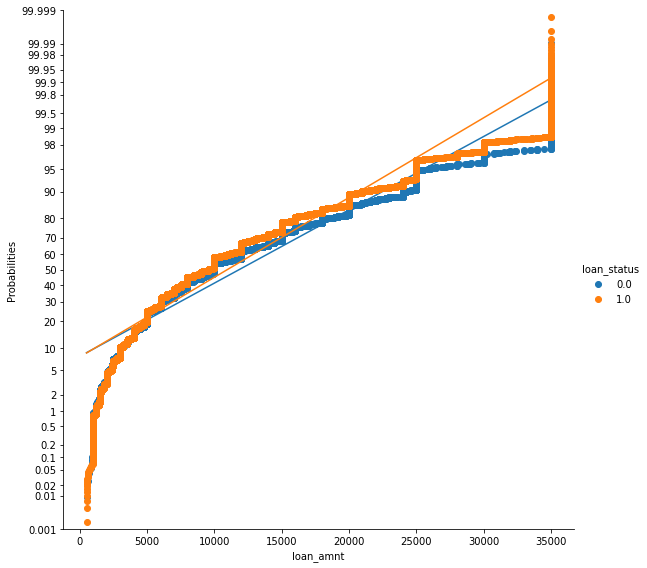

In [ ]:
g = sns.FacetGrid(df, hue='loan_status', height=8)
g.map(probscale.probplot, 'loan_amnt', probax='y', bestfit=True)
g.set_ylabels('Probabilities')
g.add_legend()

In [ ]:
# O ile w poprzednich wykresach, nie bylo widac roznicy miedzy grupami(loan_status), to tutaj widac lekka przewage na rzecz status=1
# Warto tez wspomniec, ze im wyzsza kwota pozyczki, tym wieksze prawdopodobientwo splaty, ktore rosnie skokowo powyzej kwoty 35000

In [ ]:
# 	•	Wytrenuj 5 różnych modeli, wykorzystując do każdego inny algorytm, a następnie porównaj ich działanie, za metrykę oceny jakości modelu przyjmij AUROC score. (50pkt)

Przed modelowaniem, spójrzmy jeszcze raz na zmienne, by sprawdzić czy mają brakujące wartości oraz zajmijmy się prawidłowym kodowaniem zmiennych kategorycznych oraz zmienych ilościowych, które błednie zostały rozpoznane jako dane tekstowe

In [ ]:
df = encode_and_bind(df, "verification_status") 
df = encode_and_bind(df, "purpose") #6 od 17 nowych zmiennych
df = encode_and_bind(df, "loan_group")

In [ ]:
X_num = get_numerical_columns(df)

In [ ]:
X_num.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,collection_recovery_fee,last_fico_range_high,last_fico_range_low,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,fico_average,rok_pozyczki,czas_trwania_pozyczki
0,5000.0,5000.0,4975.0,36.0,10.65,162.87,5.0,10.0,1,24000.0,1.0,27.65,0.0,735.0,739.0,1.0,3.0,0.0,13648.0,83.7,9.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,739.0,735.0,0.0,0.0,0.0,0.0,737.0,1985,23
1,2500.0,2500.0,2500.0,60.0,15.27,59.83,4.0,0.0,1,30000.0,0.0,1.00,0.0,740.0,744.0,5.0,3.0,0.0,1687.0,9.4,4.0,1014.530000,1014.53,456.46,435.17,0.00,1.11,499.0,0.0,0.0,0.0,0.0,0.0,742.0,1999,9
2,2400.0,2400.0,2400.0,36.0,15.96,84.33,4.0,10.0,1,12252.0,1.0,8.72,0.0,735.0,739.0,2.0,2.0,0.0,2956.0,98.5,10.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,739.0,735.0,0.0,0.0,0.0,0.0,737.0,2001,7
3,10000.0,10000.0,10000.0,36.0,13.49,339.31,4.0,10.0,1,49200.0,1.0,20.00,0.0,690.0,694.0,1.0,10.0,0.0,5598.0,21.0,37.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,604.0,600.0,0.0,0.0,0.0,0.0,692.0,1996,12
4,3000.0,3000.0,3000.0,60.0,12.69,67.79,5.0,1.0,1,80000.0,1.0,17.94,0.0,695.0,699.0,0.0,15.0,0.0,27783.0,53.9,38.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.00,684.0,680.0,0.0,0.0,0.0,0.0,697.0,1996,12


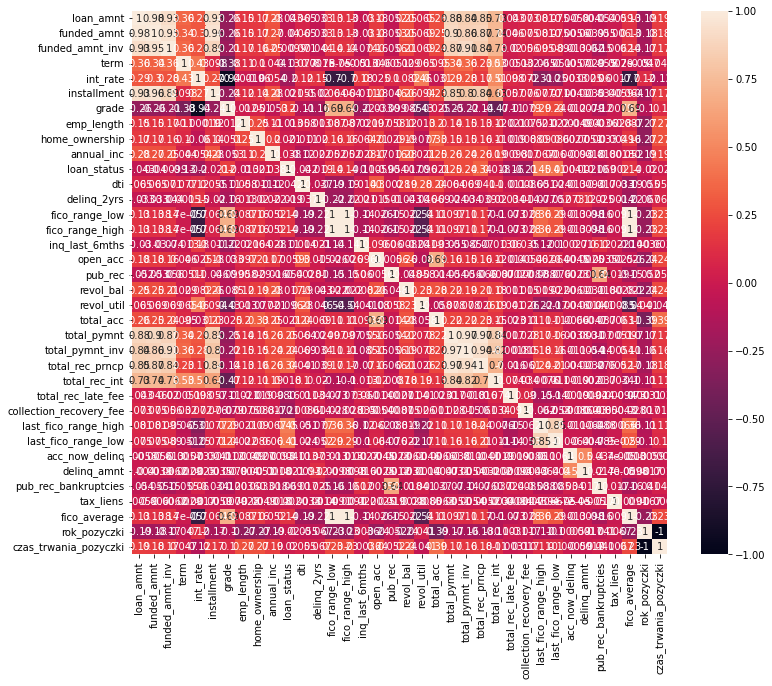

In [ ]:
data_cor = X_num
data_cor['loan_status']=df['loan_status']

cor = show_heatmap(data_cor)

In [ ]:
#redukkcja wymiarow poprzez korelacje
target_name = 'loan_status'
cor_target = abs(cor[target_name])
high_corr = cor_target[(cor_target>0.2) & (cor_target!=1) ]
high_corr

int_rate                   0.200598
grade                      0.201283
total_pymnt                0.245428
total_pymnt_inv            0.242884
total_rec_prncp            0.342275
collection_recovery_fee    0.210207
last_fico_range_high       0.448712
last_fico_range_low        0.408287
Name: loan_status, dtype: float64

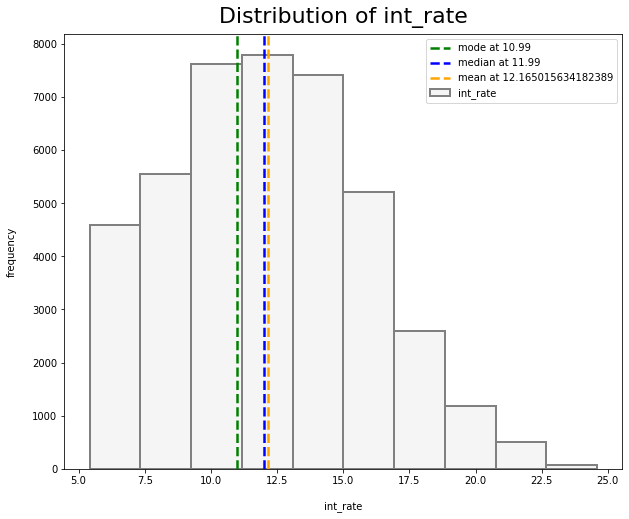

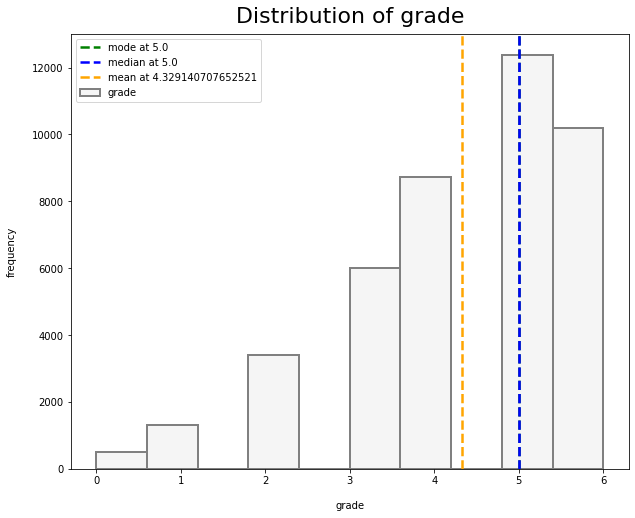

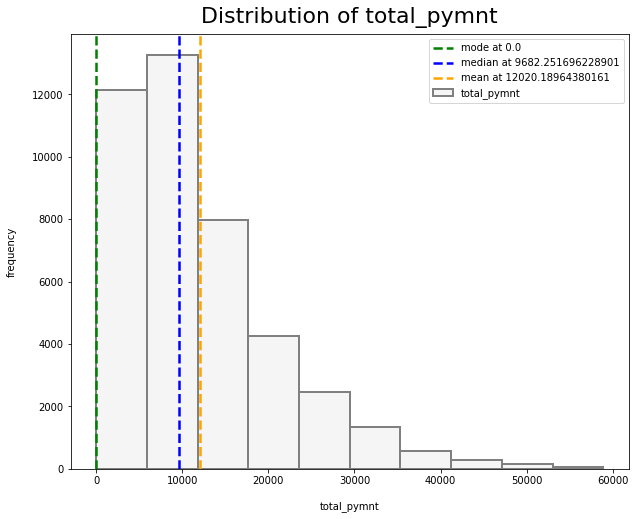

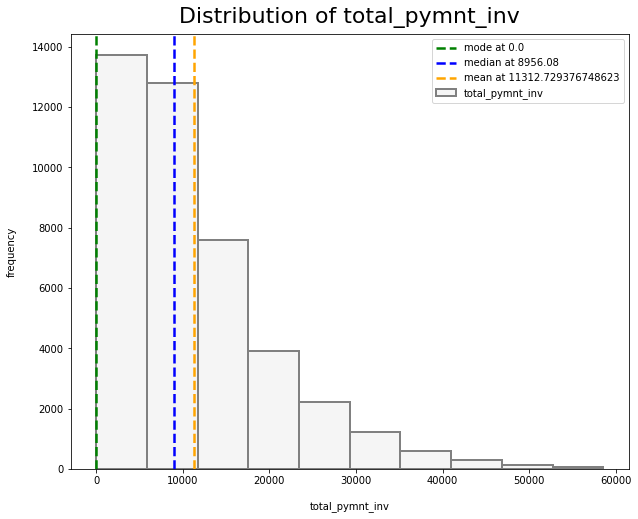

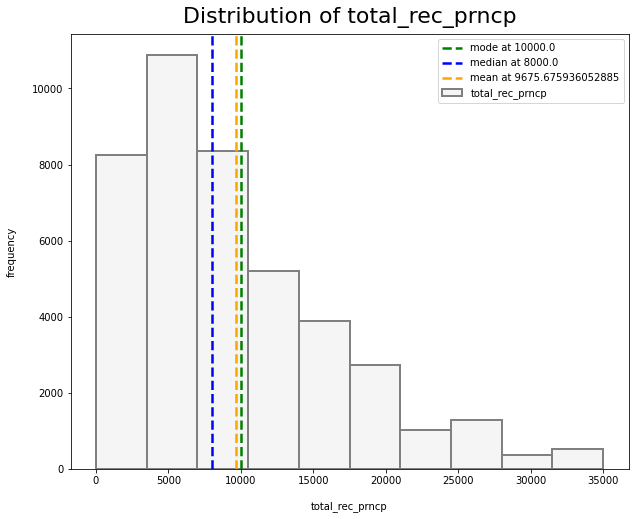

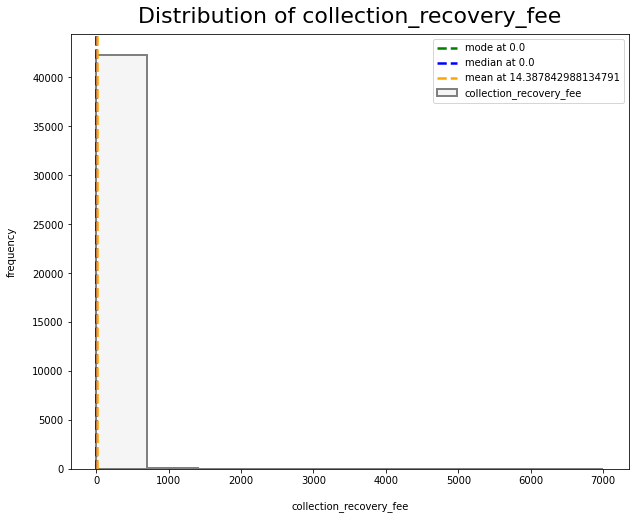

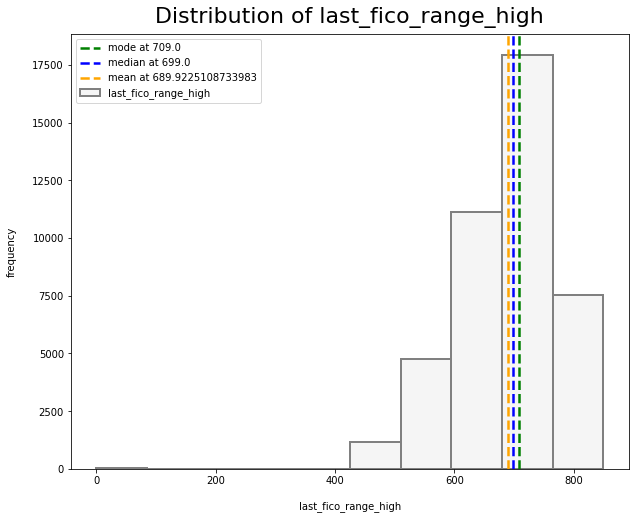

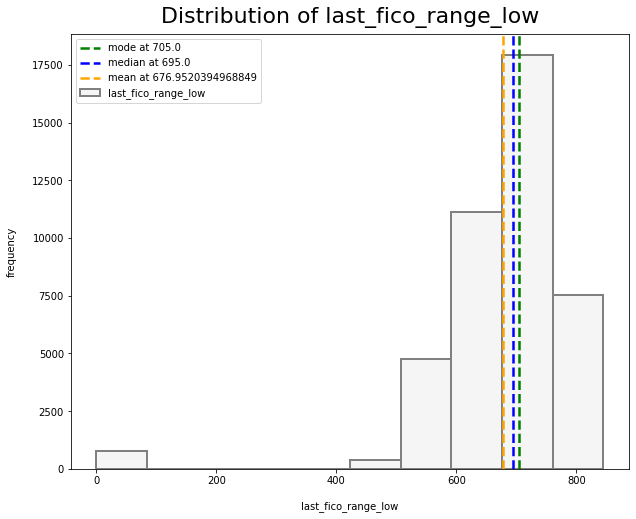

In [ ]:
for col in high_corr.index:
  mode, median, mean = df[col].mode()[0], df[col].median(), df[col].mean()
  df[col].plot(kind='hist', figsize=(10, 8), linewidth=2, color='whitesmoke', edgecolor='gray')
  plt.xlabel(str(col), labelpad=15)
  plt.ylabel("frequency", labelpad=15)
  plt.title("Distribution of {col}".format(col=col), y=1.012, fontsize=22)
  measurements = [mode, median, mean]
  names = ["mode", "median", "mean"]
  colors = ['green', 'blue', 'orange']
  
  for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=color)
    plt.legend();
  plt.show()




In [ ]:
#wiekszosc wykresow nie jest symetryczna i nie przypomina rozkladu normalnego, ktory jest czestym założeniem odnośnie danych, poprzez standaryzacje postaramy sie osiagnac ten efekt

In [ ]:
#independent and dependent variables

y_name = 'loan_status'

y = X_num[y_name]
X = X_num[X_num.columns.difference([y_name])]

X = standarization(X)


# X = df[df.columns.difference([y_name])]

In [ ]:
for col in X.columns:
  X[col]=X[col].astype(np.float16)

In [ ]:
 y = y.astype(np.int8)

In [ ]:
X.replace([np.inf, -np.inf], 0, inplace=True)
X

,acc_now_delinq,annual_inc,collection_recovery_fee,czas_trwania_pozyczki,delinq_2yrs,delinq_amnt,dti,emp_length,fico_average,fico_range_high,fico_range_low,funded_amnt,funded_amnt_inv,grade,home_ownership,inq_last_6mths,installment,int_rate,last_fico_range_high,last_fico_range_low,loan_amnt,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,rok_pozyczki,tax_liens,term,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp
0,-0.000094,-0.007523,-0.002054,0.186890,-0.011734,-0.000024,0.476074,0.506836,0.026535,0.026474,0.026596,-0.166382,-0.147583,0.111816,-0.195679,-0.002453,-0.122375,-0.061615,0.057739,0.068726,-0.173950,-0.134888,-0.011627,-0.036713,-0.000538,0.290527,-0.005772,-0.000023,-0.103455,-0.145752,-0.104553,-0.093567,-0.057648,-0.007259,-0.133545
1,-0.000094,-0.006523,-0.001896,-0.038910,-0.011734,-0.000024,-0.412598,-0.492920,0.032593,0.032501,0.032654,-0.237793,-0.218262,-0.054871,-0.195679,0.118774,-0.201294,0.126221,-0.224609,-0.801270,-0.245361,-0.134888,-0.011627,-0.036713,-0.010445,-0.333740,0.001202,-0.000023,0.296631,-0.201294,-0.186890,-0.175903,-0.075562,-0.007259,-0.263428
2,-0.000094,-0.009483,-0.002054,-0.071167,-0.011734,-0.000024,-0.155151,0.506836,0.026535,0.026474,0.026596,-0.240601,-0.221191,-0.054871,-0.195679,0.027847,-0.182617,0.154297,0.057739,0.068726,-0.248291,-0.156250,-0.011627,-0.036713,-0.009392,0.415039,0.002197,-0.000023,-0.103455,-0.134644,-0.153076,-0.141846,-0.068420,-0.007259,-0.207886
3,-0.000094,-0.003323,-0.002054,0.009468,-0.011734,-0.000024,0.220947,0.506836,-0.027878,-0.027802,-0.027939,-0.023468,-0.003998,-0.054871,-0.195679,-0.002453,0.012787,0.053894,-0.101074,-0.091064,-0.031128,0.014015,-0.011627,-0.036713,-0.007206,-0.236328,-0.000292,-0.000023,-0.103455,0.165405,0.003595,0.015701,-0.001049,0.073914,0.009270
4,-0.000094,0.001811,-0.002054,0.009468,-0.011734,-0.000024,0.152222,-0.392822,-0.021835,-0.021774,-0.021881,-0.223511,-0.203979,0.111816,-0.195679,-0.032745,-0.195190,0.021347,-0.006969,0.003607,-0.231079,0.120422,-0.011627,-0.036713,0.011169,0.040161,-0.000292,-0.000023,0.296631,0.176514,-0.135010,-0.123718,-0.049103,-0.007259,-0.190674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42531,-0.000094,0.018478,-0.002054,-0.119568,-0.011734,-0.000024,-0.112488,-0.492920,-0.033936,-0.033844,-0.033997,-0.209229,-0.283203,-0.054871,-0.195679,-0.032745,-0.160278,-0.076660,0.151855,0.163330,-0.216797,-0.113647,-0.011627,0.463379,-0.011841,0.120850,0.003693,-0.000023,-0.103455,-0.190186,-0.140991,-0.189087,-0.084595,-0.007259,-0.176392
42532,-0.000094,-0.009521,-0.002054,-0.119568,-0.011734,-0.000024,-0.112488,-0.492920,-0.021835,-0.021774,-0.021881,-0.280518,-0.289795,0.111816,-0.195679,-0.032745,-0.222534,-0.102661,0.110657,0.121948,-0.288330,-0.113647,-0.011627,0.463379,-0.011841,0.120850,0.003693,-0.000023,-0.103455,-0.190186,-0.184448,-0.193115,-0.087280,-0.007259,-0.247925
42533,-0.000094,0.006813,-0.002054,-0.119568,-0.011734,-0.000024,-0.112488,-0.492920,-0.003691,-0.003683,-0.003700,-0.237061,-0.283203,0.111816,-0.195679,-0.032745,-0.185303,-0.115295,0.028320,0.039124,-0.244751,-0.113647,-0.011627,0.463379,-0.011841,0.120850,0.003693,-0.000023,-0.103455,-0.190186,-0.154785,-0.188721,-0.077881,-0.007259,-0.204346
42534,-0.000094,0.000145,-0.002054,-0.119568,-0.011734,-0.000024,-0.312500,-0.492920,0.032593,0.032501,0.032654,-0.123474,-0.289795,0.278564,0.604492,-0.032745,-0.090271,-0.153931,0.040100,0.050934,-0.131104,-0.113647,-0.011627,0.463379,-0.011841,0.120850,0.003693,-0.000023,-0.103455,-0.190186,-0.078918,-0.193115,-0.057190,-0.007259,-0.090759


In [ ]:
X_norm = normalization(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_norm, y, test_size=0.33, random_state=42)


In [ ]:
# target_name = 'loan_status'

# cor = show_heatmap(X_norm)
# cor_target = abs(cor[target_name])
# high_corr = cor_target[(cor_target>0.2)]
# high_corr

In [ ]:
MLA = [
       ensemble.RandomForestClassifier(),

       tree.DecisionTreeClassifier(),
       XGBClassifier(),
       AdaBoostClassifier(),
       GradientBoostingClassifier()
    ]

In [ ]:
# Wytrenuj 5 różnych modeli, wykorzystując do każdego inny algorytm, a następnie porównaj ich działanie, za metrykę oceny jakości modelu przyjmij AUROC score. (50pkt)

In [ ]:
def compare_algorithms2df(MLA, X_train, X_test, y_train, y_test, sorted_by_measure='accuracy'):
  #show grid with compared results - accuracy, recall, ppv, f1-measure, mcc
  
  MLA_columns = []
  MLA_compare = pd.DataFrame(columns = MLA_columns)


  row_index = 0
  for alg in MLA:

    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(X_train, y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    MLA_compare.loc[row_index, 'MLA Precission'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'MLA Recall'] = recall_score(y_test, predicted)
    MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)
    row_index+=1
  
  MLA_compare.sort_values(by = ['MLA AUC'], ascending = False, inplace = True)    
  return MLA_compare


def roc_curve_MLA(MLA,X_train, X_test, y_train, y_test):
  index = 1
  for alg in MLA:


      predicted = alg.fit(X_train, y_train).predict(X_test)
      fp, tp, th = roc_curve(y_test, predicted)
      roc_auc_mla = auc(fp, tp)
      MLA_name = alg.__class__.__name__
      plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (MLA_name, roc_auc_mla))

      index+=1

  plt.title('ROC Curve comparison')
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.plot([0,1],[0,1],'r--')
  plt.xlim([0,1])
  plt.ylim([0,1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')    
  plt.show()

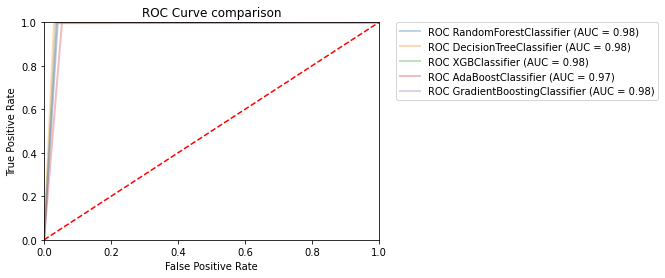

In [ ]:
roc_curve_MLA(MLA,X_train, X_test, y_train, y_test)

In [ ]:
df_ml = compare_algorithms2df(MLA,X_train, X_test, y_train, y_test)
df_ml["PCA"]="Nie"

In [ ]:
#redukcja rozmiarow przez PCA

In [ ]:
## wykonanie standaryzacji przed zastosowaniem PCA
cols = X_train.columns

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
pca = PCA(random_state=21)
pca=pca.fit(X_train)

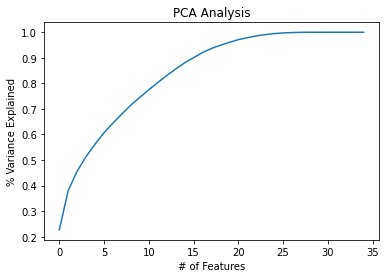

In [ ]:
cum_sum = np.cumsum(pca.explained_variance_ratio_)
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.style.context('seaborn-whitegrid')
plt.plot(cum_sum)

In [ ]:
#dane pca

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
# roc_curve_MLA(MLA,X_train_pca, X_test_pca, y_train, y_test)

In [ ]:
# pca_ml = compare_algorithms2df(MLA,X_train_pca, X_test_pca, y_train, y_test)
# pca_ml['PCA']="Tak"

In [ ]:
# ml_results = pd.concat([df_ml, pca_ml])
# ml_results.sort_values(by = ['MLA AUC'], ascending = False, inplace = True)
# ml_results

In [ ]:
#Jak widać, w żadnym PCA nie poprawiła wyniku klasyfikacji

In [ ]:
# 	•	Zbuduj finalny model, którego AUROC score będzie >= 80%, pamiętaj o doborze istotnych zmiennych, kroswalidacji oraz dostrojeniu parametrów modelu, pomyśl również o zbalansowaniu klas. (40pkt)

In [ ]:
# Okazuje sie ze Decision tree ma najwyzszy wynik, wiec go bedziemy tuningowac
final_model = tree.DecisionTreeClassifier()


In [ ]:
#feature sslection


def chi2_selector(X,y, N=100):
  from sklearn.feature_selection import SelectKBest
  from sklearn.feature_selection import chi2
  from sklearn.preprocessing import MinMaxScaler
  X_norm = MinMaxScaler().fit_transform(X)
  chi_selector = SelectKBest(chi2, k=N)
  chi_selector.fit(X_norm, y)
  chi_support = chi_selector.get_support()
  chi_feature = X.loc[:,chi_support].columns.tolist()


  return chi_feature




def xgb_reg_feat_importances(X,y, ratio=0.3,random_state=42):
  train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=ratio, random_state=random_state)
  clf = xgb.XGBRegressor(objective="reg:linear", random_state=random_state)
  clf = clf.fit(train_X, train_y)
  feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
  feat_importances.nlargest(5).plot(kind='barh')
  feat = [feat_importances.nlargest(5).axes[0][i] for i in range(len(feat_importances.nlargest(5).axes[0]))]

  return feat

In [ ]:
y_name = 'loan_status'
y = data_cor[y_name]
X = data_cor[data_cor.columns.difference([y_name])]
chi2_columns = chi2_selector(X,y, 10)
chi2_columns

['collection_recovery_fee',
 'grade',
 'int_rate',
 'last_fico_range_low',
 'pub_rec_bankruptcies',
 'term',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_late_fee',
 'total_rec_prncp']

[20:48:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


['collection_recovery_fee',
 'funded_amnt',
 'total_rec_prncp',
 'last_fico_range_high',
 'loan_amnt']

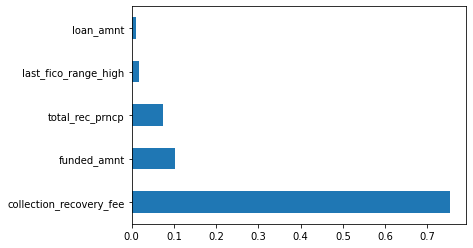

In [ ]:
xgb_columns = xgb_reg_feat_importances(X_norm,y)
xgb_columns

In [ ]:
#redukkcja wymiarow poprzez korelacje
cor = X_num.corr()
target_name = 'loan_status'
cor_target = abs(cor[target_name])


high_corr = cor_target[(cor_target>0.2) & (cor_target!=1) ]
high_corr

int_rate                   0.200598
grade                      0.201283
total_pymnt                0.245428
total_pymnt_inv            0.242884
total_rec_prncp            0.342275
collection_recovery_fee    0.210207
last_fico_range_high       0.448712
last_fico_range_low        0.408287
Name: loan_status, dtype: float64

In [ ]:
#cross walidacja high_corr
cv_results = cross_validate(final_model, X_num[high_corr.index], y, cv=5, scoring='roc_auc')

In [ ]:
mean_auc = round(np.mean(cv_results['test_score']),2)
std_auc = round(np.std(cv_results['test_score']),2)

print("AUC dla high corelated features {}+-{}".format(mean_auc, 3*std_auc))

AUC dla high corelated features 0.94+-0.09


In [ ]:
#cross walidacja chi2_columns
cv_results = cross_validate(final_model, X_num[chi2_columns], y, cv=5, scoring='roc_auc')

In [ ]:
mean_auc = round(np.mean(cv_results['test_score']),2)
std_auc = round(np.std(cv_results['test_score']),2)

print("AUC dla chi2_columns {}+-{}".format(mean_auc, 3*std_auc))

AUC dla chi2_columns 0.95+-0.06


In [ ]:
#cross walidacja xgb_columns
cv_results = cross_validate(final_model, X_num[xgb_columns], y, cv=5, scoring='roc_auc')

In [ ]:
mean_auc = round(np.mean(cv_results['test_score']),2)
std_auc = round(np.std(cv_results['test_score']),2)

print("AUC dla xgb_columns {}+-{}".format(mean_auc, 3*std_auc))

AUC dla xgb_columns 0.99+-0.0


In [ ]:
#Okazuje się że najlepszy wynik daje selekcja chech uzywajaca testu CHI2

In [ ]:
# Zobaczmy co sie zmieni, jesli sprobujemy zbalansowac klasy, i potem znowu uzyjemy tych samych modeli

In [ ]:
#cross walidacja high_corr i smote
X_sm, y_sm = smote(X_num[high_corr.index], y)
cv_results = cross_validate(final_model, X_sm, y_sm, cv=5, scoring='roc_auc')
mean_auc = round(np.mean(cv_results['test_score']),2)
std_auc = round(np.std(cv_results['test_score']),2)
print("AUC dla high corelated features i SMOTE {}+-{}".format(mean_auc, 3*std_auc))

#cross walidacja chi2_columns

X_sm, y_sm = smote(X_num[chi2_columns], y)
cv_results = cross_validate(final_model, X_sm, y_sm, cv=5, scoring='roc_auc')
mean_auc = round(np.mean(cv_results['test_score']),2)
std_auc = round(np.std(cv_results['test_score']),2)
print("AUC dla chi2_columns i SMOTE {}+-{}".format(mean_auc, 3*std_auc))

#cross walidacja xgb_columns
X_sm, y_sm = smote(X_num[xgb_columns[1:]], y)
cv_results = cross_validate(final_model, X_sm, y_sm, cv=5, scoring='roc_auc')
mean_auc = round(np.mean(cv_results['test_score']),2)
std_auc = round(np.std(cv_results['test_score']),2)
print("AUC dla xgb_columns i SMOTE {}+-{}".format(mean_auc, 3*std_auc))




AUC dla high corelated features i SMOTE 0.97+-0.09
AUC dla chi2_columns i SMOTE 0.97+-0.09
AUC dla xgb_columns i SMOTE 1.0+-0.0


In [ ]:
#Okazuje sie, że technika SMOTE: Synthetic Minority Over-sampling Technique, jeszce bardziej zwiększa wynik AUC.


In [ ]:
# Statistical testing

In [ ]:
# Bedziemy uzywac testu t, wiec naezy sprawdzic kilka zalozen
# 1) rownolicznosc
# 2) jednorodnosc wariancji - test levena
# 3) normalnosc danych -  test Shapiro Wilka

In [ ]:
low_grade = df[df['grade'] < 4]['loan_status']
high_grade = df[df['grade'] >= 4]['loan_status']

In [ ]:
# 2) jednorodnosc wariancji - test levena

stat, p_value = stats.levene(low_grade, high_grade)
print('Statistics=%.3f, p=%.3f' % (stat, p_value))
alpha= 0.05

if p_value > alpha:
	print('the p-value suggests that the data follows the assumption of equal variance')
else:
	print('the p-value suggests that the data NOT follows the assumption of equal varianc')




Statistics=1177.369, p=0.000
the p-value suggests that the data NOT follows the assumption of equal varianc


In [ ]:
# 3) normalnosc danych
p_value = stats.shapiro(low_grade)[1]
stat = stats.shapiro(low_grade)[1]
print('Statistics=%.3f, p=%.3f' % (stat, p_value))

alpha= 0.05
if p_value > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')


Statistics=0.000, p=0.000
Sample does not look Gaussian (reject H0)


In [ ]:
#Zalozenia nie sa spelnione, wiec powinismy uzyc testu wilcoxona

In [ ]:
stat, p_value = ranksums(low_grade, high_grade)

In [ ]:
# Hipoteza - nie ma korelacji pomiędzy 'grade' a 'loan_status'.

alpha= 0.05
if p_value > alpha:
	print('Nie ma zaleznosci między grade a loan(nie odrzucamy H0)')
else:
	print('Jest zależność między grade a loan(odrzucamy H0)')



Jest zależność między grade a loan(odrzucamy H0)


In [ ]:
y_name = 'loan_status'

X = df[df.columns.difference([y_name])] 
y = df[y_name]




In [ ]:
# 	•	Wykonaj klasteryzację danych i sprawdź, czy występują jakieś segmenty pożyczkobiorców, wykorzystaj odpowiednie metody do określenia optymalnej liczby klastrów (40 pkt)

In [ ]:
#kmeans

In [ ]:
ss = StandardScaler(with_std=False)
sdf = ss.fit_transform(X_num)

distortions = [] #sse
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(sdf)
    distortions.append(km.inertia_)



In [ ]:
#szukamy najwiekszej zmiany distortion, pozycja najwiekszej zmiany distortion pokaze na optymalna liczbe klastrow
diffs = list(map(abs, np.diff(distortions)))
maxi = max(diffs[1:])
k = diffs.index(maxi)+1


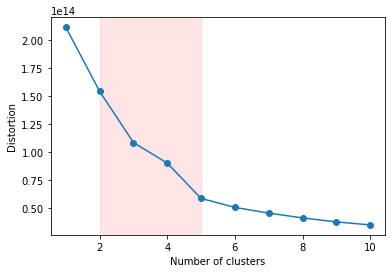

In [ ]:
# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.axvspan(k, k+3, color='red', alpha=0.1)
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
#wyniki klasteryzacji wskazuja na optymalna liczbe klastow miedzy k=2 a k=5